# KDD Cup 2009
https://www.kaggle.com/yasmino/kdd-cup-2009-data-analysis

## Step 1: Modeling Churn
Customer churn is when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company.

In [139]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score

### Loading Data

In [2]:
df_features = pd.read_csv('../kaggle_database/course1/kdd/orange_small_train.data', sep='\t', na_filter=False)
df_labels = pd.read_csv('../kaggle_database//course1/kdd/orange_small_train_churn.labels', header=None)

In [3]:
df_features.shape, df_labels.shape

((50000, 230), (50000, 1))

In [4]:
df_features.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,,,,,,1526,7,,,,...,oslk,fXVEsaq,jySVZNlOJy,,,xb3V,RAYp,F2FyR07IdsN7I,,
1,,,,,,525,0,,,,...,oslk,2Kb5FSF,LM8l689qOp,,,fKCe,RAYp,F2FyR07IdsN7I,,
2,,,,,,5236,7,,,,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,
3,,,,,,,0,,,,...,oslk,CE7uk3u,LM8l689qOp,,,FSa2,RAYp,F2FyR07IdsN7I,,
4,,,,,,1029,7,,,,...,oslk,1J2cvxe,LM8l689qOp,,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,


In [5]:
df_labels.head()

,0
0,-1
1,1
2,-1
3,-1
4,-1


In [6]:
# Show the unique values
np.unique(df_labels)

array([-1,  1])

### Identifying numerical and categorical variables

In [7]:
all_vars = np.array(df_features.columns)
all_vars

array(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8',
       'Var9', 'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15',
       'Var16', 'Var17', 'Var18', 'Var19', 'Var20', 'Var21', 'Var22',
       'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29',
       'Var30', 'Var31', 'Var32', 'Var33', 'Var34', 'Var35', 'Var36',
       'Var37', 'Var38', 'Var39', 'Var40', 'Var41', 'Var42', 'Var43',
       'Var44', 'Var45', 'Var46', 'Var47', 'Var48', 'Var49', 'Var50',
       'Var51', 'Var52', 'Var53', 'Var54', 'Var55', 'Var56', 'Var57',
       'Var58', 'Var59', 'Var60', 'Var61', 'Var62', 'Var63', 'Var64',
       'Var65', 'Var66', 'Var67', 'Var68', 'Var69', 'Var70', 'Var71',
       'Var72', 'Var73', 'Var74', 'Var75', 'Var76', 'Var77', 'Var78',
       'Var79', 'Var80', 'Var81', 'Var82', 'Var83', 'Var84', 'Var85',
       'Var86', 'Var87', 'Var88', 'Var89', 'Var90', 'Var91', 'Var92',
       'Var93', 'Var94', 'Var95', 'Var96', 'Var97', 'Var98', 'Var99',
       'Var100', 'Va

In [8]:
num_vars = np.array(all_vars[:190])
num_vars

array(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8',
       'Var9', 'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15',
       'Var16', 'Var17', 'Var18', 'Var19', 'Var20', 'Var21', 'Var22',
       'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29',
       'Var30', 'Var31', 'Var32', 'Var33', 'Var34', 'Var35', 'Var36',
       'Var37', 'Var38', 'Var39', 'Var40', 'Var41', 'Var42', 'Var43',
       'Var44', 'Var45', 'Var46', 'Var47', 'Var48', 'Var49', 'Var50',
       'Var51', 'Var52', 'Var53', 'Var54', 'Var55', 'Var56', 'Var57',
       'Var58', 'Var59', 'Var60', 'Var61', 'Var62', 'Var63', 'Var64',
       'Var65', 'Var66', 'Var67', 'Var68', 'Var69', 'Var70', 'Var71',
       'Var72', 'Var73', 'Var74', 'Var75', 'Var76', 'Var77', 'Var78',
       'Var79', 'Var80', 'Var81', 'Var82', 'Var83', 'Var84', 'Var85',
       'Var86', 'Var87', 'Var88', 'Var89', 'Var90', 'Var91', 'Var92',
       'Var93', 'Var94', 'Var95', 'Var96', 'Var97', 'Var98', 'Var99',
       'Var100', 'Va

In [9]:
cat_vars = np.array(all_vars[190:])
cat_vars

array(['Var191', 'Var192', 'Var193', 'Var194', 'Var195', 'Var196',
       'Var197', 'Var198', 'Var199', 'Var200', 'Var201', 'Var202',
       'Var203', 'Var204', 'Var205', 'Var206', 'Var207', 'Var208',
       'Var209', 'Var210', 'Var211', 'Var212', 'Var213', 'Var214',
       'Var215', 'Var216', 'Var217', 'Var218', 'Var219', 'Var220',
       'Var221', 'Var222', 'Var223', 'Var224', 'Var225', 'Var226',
       'Var227', 'Var228', 'Var229', 'Var230'], dtype=object)

### Verifying the consistency of variables

In [10]:
# Ensure the variables numerics are numbers
df_features.dtypes
# dtypes are returni as objects

Var1      object
Var2      object
Var3      object
Var4      object
Var5      object
           ...  
Var226    object
Var227    object
Var228    object
Var229    object
Var230    object
Length: 230, dtype: object

In [11]:
df_features.groupby('Var1').size()

Var1
       49298
0        380
120        1
128        2
152        1
16        81
24        46
32        23
360        1
392        1
40        10
48         6
536        1
56         5
64         1
680        1
72         3
8        138
80         1
dtype: int64

In [12]:
registers_per_column = pd.DataFrame()
for col in num_vars:
    feature_size = df_features.groupby(col).size()
    registers_per_column = registers_per_column.append(feature_size, ignore_index=True)

In [13]:
registers_per_column.shape

(190, 351788)

In [14]:
registers_per_column.head()

,,0,120,128,152,16,24,32,360,392,...,8900.46,920.88,9336.06,9379.709,9441.36,9607.05,966.15,9772.021,98.1,9857.88
0,49298.0,380.0,1.0,2.0,1.0,81.0,46.0,23.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48759.0,1240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48760.0,996.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48421.0,1561.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48513.0,898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Transpose of dataframe
registers_per_column.T.shape

(351788, 190)

In [16]:
registers_per_column.T.head()

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,189
,49298.0,48759.0,48760.0,48421.0,48513.0,5529.0,5539.0,50000.0,49298.0,48513.0,...,5009.0,48421.0,48759.0,48759.0,50000.0,49298.0,49298.0,48759.0,28978.0,49667.0
0,380.0,1240.0,996.0,1561.0,898.0,976.0,13090.0,NaN,144.0,902.0,...,41990.0,706.0,830.0,771.0,NaN,525.0,240.0,44.0,NaN,4.0
120,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN
128,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
counts_per_column = registers_per_column.T
counts_per_column.index = counts_per_column.index.astype('str')
counts_per_column.sort_index(inplace=True)
counts_per_column.index
# Checking if all the values are numbers
print('The ten top index', counts_per_column.index[:10])
print('The ten last index', counts_per_column.index[len(counts_per_column)-10:])

The ten top index Index(['', '-10', '-1000060.0', '-10002.16', '-100034.8', '-1000420.0',
       '-1000468.0', '-1000496.0', '-1000516.0', '-1000548.0'],
      dtype='object')
The ten last index Index(['9999040', '999920', '9999240', '99993', '9999400', '9999440',
       '9999480', '99995', '99996', '999971'],
      dtype='object')


In [18]:
# ensure that all registers in cat_vars are strings
df_cat_vars = pd.DataFrame()
for col in cat_vars:
    cat_column = df_features.groupby(col).size()
    df_cat_vars = df_cat_vars.append(cat_column, ignore_index=True)

In [19]:
df_cat_vars.shape

(40, 71505)

In [20]:
df_cat_vars = df_cat_vars.T
df_cat_vars.index = df_cat_vars.index.astype('str')
df_cat_vars.sort_index(inplace=True)
# Checking if all the values are numbers
print('The ten top index', df_cat_vars.index[:10])
print('The ten last index', df_cat_vars.index[len(df_cat_vars)-10:])

The ten top index Index(['', '000J', '0062', '00AD', '00ARusu', '00AYONy', '00AhP4J', '00J8E9a',
       '00JHTSP', '00L3'],
      dtype='object')
The ten last index Index(['zzQ9udm', 'zzQV', 'zzbGOGx', 'zzbGa54', 'zzcv6yg4s3UGv', 'zzfHvGh',
       'zzfLM_S', 'zzfUfAI', 'zzfo6HG', 'zzpZ'],
      dtype='object')


In [21]:
# Completing values missing with NaN
df_features.replace('', np.NaN, inplace=True)
df_features.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526,7,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525,0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236,7,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029,7,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [22]:
# Change the types of variables to float and category respectively
for col in num_vars:
    df_features[col] = df_features[col].astype('float')
for col in cat_vars:
    df_features[col] = df_features[col].astype('category')

In [23]:
df_features.dtypes

Var1       float64
Var2       float64
Var3       float64
Var4       float64
Var5       float64
            ...   
Var226    category
Var227    category
Var228    category
Var229    category
Var230    category
Length: 230, dtype: object

### Featuring Selection

In [24]:
df_features.isna()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
1,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
2,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
3,True,True,True,True,True,True,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
4,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,True,False,False,False,True,True
49996,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
49997,True,True,True,True,True,False,False,True,True,True,...,False,False,False,True,False,False,False,False,True,True
49998,True,True,True,False,True,True,True,True,True,True,...,False,False,False,True,True,False,False,False,True,True


In [25]:
col_with_null = df_features.isna().sum(axis=0)
col_with_null

Var1      49298
Var2      48759
Var3      48760
Var4      48421
Var5      48513
          ...  
Var226        0
Var227        0
Var228        0
Var229    28432
Var230    50000
Length: 230, dtype: int64

Median 48513.0


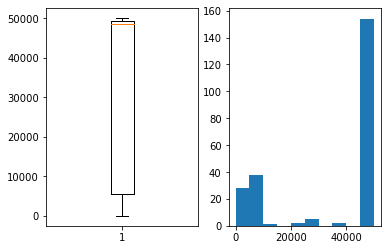

In [26]:
# Ploting a graph to visualize the missing data
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(col_with_null)
ax2.hist(col_with_null);
median = col_with_null.median()
print('Median', median)

In [27]:
# Removing variables with more than 25% of missed data
threshold = 0.25
limit_of_nulls = len(df_features) * threshold
limit_of_nulls

12500.0

In [28]:
vars_filtered_threshold = np.array(df_features.columns[(col_with_null <= limit_of_nulls)])
vars_filtered_threshold

array(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25',
       'Var28', 'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73',
       'Var74', 'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var109',
       'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var132',
       'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149',
       'Var153', 'Var160', 'Var163', 'Var173', 'Var181', 'Var192',
       'Var193', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199',
       'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207',
       'Var208', 'Var210', 'Var211', 'Var212', 'Var216', 'Var217',
       'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223',
       'Var226', 'Var227', 'Var228'], dtype=object)

In [29]:
num_vars = [elem for elem in num_vars if elem in vars_filtered_threshold]
cat_vars = [elem for elem in cat_vars if elem in vars_filtered_threshold]
print(len(num_vars), len(cat_vars))

38 28


In [30]:
num_vars

['Var6',
 'Var7',
 'Var13',
 'Var21',
 'Var22',
 'Var24',
 'Var25',
 'Var28',
 'Var35',
 'Var38',
 'Var44',
 'Var57',
 'Var65',
 'Var73',
 'Var74',
 'Var76',
 'Var78',
 'Var81',
 'Var83',
 'Var85',
 'Var109',
 'Var112',
 'Var113',
 'Var119',
 'Var123',
 'Var125',
 'Var132',
 'Var133',
 'Var134',
 'Var140',
 'Var143',
 'Var144',
 'Var149',
 'Var153',
 'Var160',
 'Var163',
 'Var173',
 'Var181']

In [31]:
# Fill the NaN values
for col in num_vars:
    col_mean = df_features[col].mean()
    df_features[col] = df_features[col].fillna(col_mean)
    
for col in cat_vars:
    df_features[col] = df_features[col].cat.add_categories('missing')
    df_features[col] = df_features[col].fillna('missing')

In [32]:
# Categorical variables with lot of categories
n_cols_categoricals = df_features[cat_vars].apply(lambda x : len(set(x)))
n_cols_categoricals

Var192      362
Var193       51
Var195       23
Var196        4
Var197      226
Var198     4291
Var199     5074
Var202     5714
Var203        6
Var204      100
Var205        4
Var206       22
Var207       14
Var208        3
Var210        6
Var211        2
Var212       81
Var216     2016
Var217    13991
Var218        3
Var219       23
Var220     4291
Var221        7
Var222     4291
Var223        5
Var226       23
Var227        7
Var228       30
dtype: int64

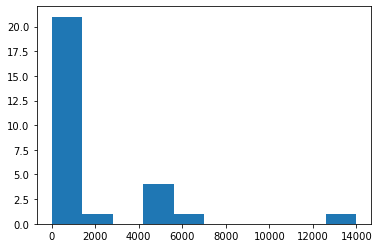

In [33]:
plt.hist(n_cols_categoricals);

In [34]:
# Applying threshold to filter cat_vars
cat_threshold = 1400
cat_vars_filtered_threshold = np.array(n_cols_categoricals[n_cols_categoricals < cat_threshold].index)
cat_vars_filtered_threshold

array(['Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var203',
       'Var204', 'Var205', 'Var206', 'Var207', 'Var208', 'Var210',
       'Var211', 'Var212', 'Var218', 'Var219', 'Var221', 'Var223',
       'Var226', 'Var227', 'Var228'], dtype=object)

In [35]:
print(len(n_cols_categoricals),len(cat_vars_filtered_threshold))

28 21


In [36]:
df_features = df_features[list(cat_vars_filtered_threshold) + list(num_vars)]
df_features.shape

(50000, 59)

In [37]:
df_features.isna().sum()

Var192    0
Var193    0
Var195    0
Var196    0
Var197    0
Var203    0
Var204    0
Var205    0
Var206    0
Var207    0
Var208    0
Var210    0
Var211    0
Var212    0
Var218    0
Var219    0
Var221    0
Var223    0
Var226    0
Var227    0
Var228    0
Var6      0
Var7      0
Var13     0
Var21     0
Var22     0
Var24     0
Var25     0
Var28     0
Var35     0
Var38     0
Var44     0
Var57     0
Var65     0
Var73     0
Var74     0
Var76     0
Var78     0
Var81     0
Var83     0
Var85     0
Var109    0
Var112    0
Var113    0
Var119    0
Var123    0
Var125    0
Var132    0
Var133    0
Var134    0
Var140    0
Var143    0
Var144    0
Var149    0
Var153    0
Var160    0
Var163    0
Var173    0
Var181    0
dtype: int64

In [38]:
df_features

,Var192,Var193,Var195,Var196,Var197,Var203,Var204,Var205,Var206,Var207,...,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181
0,bZkvyxLkBI,RO12,taul,1K8T,lK27,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,...,69134.000000,185.000000,0.000000,9.000000,397579.000000,1.812252e+06,142.000000,38418.000000,0.000000,0.000000
1,CEat0G8rTN,RO12,taul,1K8T,2Ix5,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,...,357038.000000,0.000000,0.000000,9.000000,278334.000000,1.043916e+07,32.000000,238572.000000,0.000000,0.000000
2,eOQt0GoOh3,AERks4l,taul,1K8T,ffXs,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,...,248932.000000,800.000000,0.000000,36.000000,320565.000000,9.826360e+06,206.000000,434946.000000,0.000000,0.000000
3,jg69tYsGvO,RO12,taul,1K8T,ssAy,9_Y1,YULl,VpdQ,missing,me75fM6ugJ,...,0.000000,0.000000,0.000000,11.727665,294920.804255,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4,IXSgUHShse,RO12,taul,1K8T,uNkU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,...,66046.000000,3255.000000,0.000000,9.000000,267162.000000,6.448360e+05,2.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,xOXr4RXktW,RO12,taul,1K8T,ZNsX,9_Y1,ZKJc,VpdQ,zm5i,me75fM6ugJ,...,0.000000,0.000000,0.000000,9.000000,604800.000000,1.036704e+07,22.000000,0.000000,0.000000,0.000000
49996,S8dr4RQxul,2Knk1KF,I9xt3GBDKUbd8,1K8T,JLbT,9_Y1,RVjC,09_Q,sYC_,me75fM6ugJ,...,39652.000000,0.000000,0.000000,9.000000,85120.000000,1.344900e+06,150.000000,9540.000000,0.000000,0.000000
49997,uUdt0G8EIb,2Knk1KF,taul,1K8T,0Xwj,F3hy,k13i,VpdQ,kxE9,me75fM6ugJ,...,131588.000000,675.000000,0.000000,27.000000,4410.000000,1.242044e+06,124.000000,61734.000000,0.000000,0.000000
49998,FoxgUHSK8h,RO12,taul,1K8T,AHgj,9_Y1,mTeA,09_Q,missing,me75fM6ugJ,...,437340.384877,1381.259643,0.058012,11.727665,294920.804255,6.181967e+06,38.803005,486077.956658,0.006846,0.611456


In [39]:
# Feature Selection using Decision Tree

# One Hot Encoding -> get dummyes
feature_churn = pd.get_dummies(df_features)
feature_churn.shape

(50000, 1052)

In [40]:
feature_churn.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var228__cTCyH95OE93jSkoIBT,Var228_am14IcfM7tWLrUmRT52KtA,Var228_b9qbUNk0dML_Mvi2,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0,Var228_missing
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,...,0,0,0,0,0,0,0,0,0,0
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,...,0,0,0,0,1,0,0,0,0,0
3,1326.437116,0.0,0.0,234.518225,0.0,4.507926,0.0,22.08,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# hadling with data labels
print(type(df_labels))
print(df_labels.head())
print(np.array(df_labels))
print(np.array(df_labels).ravel())

<class 'pandas.core.frame.DataFrame'>
   0
0 -1
1  1
2 -1
3 -1
4 -1
[[-1]
 [ 1]
 [-1]
 ...
 [-1]
 [-1]
 [-1]]
[-1  1 -1 ... -1 -1 -1]


In [42]:
np.array(df_labels).ravel()

array([-1,  1, -1, ..., -1, -1, -1])

In [43]:
def feat_importances(features, labels):
    model = ExtraTreesClassifier(n_estimators=200,
                                criterion='entropy',
                                verbose=0)
    model.fit(features, np.array(labels).ravel())
    
    importances = model.feature_importances_
    variables = np.array(features.columns)
    indices = np.argsort(importances)[::-1]
    importances = importances[indices]
    variables = variables[indices]
    
    return variables, importances

In [44]:
variables, importances = feat_importances(feature_churn, df_labels)

In [45]:
print(type(variables))
variables

<class 'numpy.ndarray'>


array(['Var57', 'Var113', 'Var73', ..., 'Var226_missing',
       'Var207_missing', 'Var228_missing'], dtype=object)

In [46]:
importances

array([0.01788183, 0.01742179, 0.01733135, ..., 0.        , 0.        ,
       0.        ])

In [47]:
print(variables[0], importances[0])

Var57 0.01788182741218257


In [48]:
def sum_and_plot_importances(variables, importances):
    sum_importances = pd.DataFrame()
    for i in range(importances.size):
        sum_importance = importances[:(i+1)].sum()
        this_variable = pd.Series([variables[i], sum_importance])
        sum_importances = sum_importances.append(this_variable, ignore_index=True)
    plt.scatter(sum_importances.index, sum_importances.iloc[:,1])

    return sum_importances

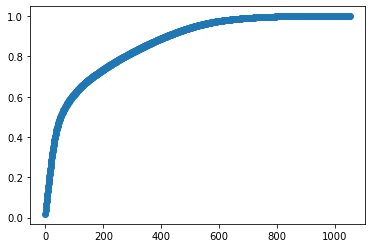

In [49]:
sum_importances = sum_and_plot_importances(variables, importances)

In [50]:
sum_importances

,0,1
0,Var57,0.017882
1,Var113,0.035304
2,Var73,0.052635
3,Var81,0.066291
4,Var153,0.079888
...,...,...
1047,Var204_missing,1.000000
1048,Var221_missing,1.000000
1049,Var226_missing,1.000000
1050,Var207_missing,1.000000


In [51]:
# Defining function to remove importances because a threshold
def features_filtered_threshold(features ,sum_importances, threshold):
    keep_vars = list(sum_importances[sum_importances.iloc[:,1] <= threshold].iloc[:,0])
    features = features.loc[:, keep_vars]
    
    return features

In [52]:
feature_churn = features_filtered_threshold(feature_churn, sum_importances, threshold=0.99)

In [53]:
feature_churn.shape

(50000, 685)

In [54]:
feature_churn.head()

,Var57,Var113,Var73,Var81,Var153,Var133,Var76,Var38,Var134,Var28,...,Var192_dPsBcmRZ57,Var192_czzTmBGxe3,Var204_7JiV,Var228_DU8B,Var193_w9ygS99Qp_,Var219_tdJW_Pm,Var192_xOXTmBkF1Q,Var192_CEaWq6KZjV,Var212_6z7lZp6XhQkon,Var207_6C53VA1kCv
0,4.076907,117625.60,36.0,7333.110000,1812252.0,1212385.0,1350864.0,3570.0,69134.0,166.56,...,0,0,0,0,0,0,0,0,0,0
1,5.408032,-356411.60,26.0,151098.900000,10439160.0,4136430.0,2872928.0,4764966.0,357038.0,353.52,...,0,0,0,0,0,0,0,0,0,0
2,6.599658,405104.00,130.0,16211.580000,9826360.0,3478905.0,1675776.0,5883894.0,248932.0,220.08,...,0,0,0,0,0,0,0,0,0,0
3,1.988250,-275703.60,12.0,103084.052693,0.0,0.0,0.0,0.0,0.0,22.08,...,0,0,0,0,0,0,0,0,0,0
4,4.552446,10714.84,82.0,37423.500000,644836.0,150650.0,784448.0,0.0,66046.0,200.00,...,0,0,0,0,0,0,0,0,0,0


### Spliting dataset between trainning and testing

In [55]:
def split_data(features, labels, test_size):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, stratify=labels, random_state=0)
    y_train, y_test = np.array(y_train).ravel(), np.array(y_test).ravel()
    return X_train, X_test, y_train, y_test

In [56]:
X_train, X_test, y_train, y_test = split_data(feature_churn, df_labels, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 685) (40000,)
(10000, 685) (10000,)


### Pre-Modeling

#### Random Forest Classifier

In [57]:
def rfc_test(X_train, y_train, n_estimators = 100, cv = 10):
    np.random.seed(0)
    rfc = RandomForestClassifier(n_estimators=n_estimators,
                                random_state=0,
                                n_jobs=-1)
    cv_scores = cross_val_score(rfc, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    print("The average of cv_scores: ", cv_scores.mean())

In [58]:
rfc_test(X_train, y_train)

The average of cv_scores:  0.6318577352378455


#### Gradient Boosting Classifier

In [59]:
def gbc_test(X_train, y_train, learning_rate = 0.1, n_estimators = 100, cv = 10):
    np.random.seed(0)
    gbc = GradientBoostingClassifier(n_estimators=n_estimators,
                                    learning_rate=learning_rate,
                                    random_state=0)
    cv_scores = cross_val_score(gbc, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    print('The average of cv_scores: ', cv_scores.mean())

In [60]:
gbc_test(X_train, y_train)

The average of cv_scores:  0.6717121236814819


In [61]:
print('The % improvement: ', 0.6712068696927659/0.6266684655598926 * 100 - 100)

The % improvement:  7.107171747198208


### Optimizing the GBC Model

In [62]:
def optimize(n_estimators,
            learning_rate,
            min_samples_split,
            min_samples_leaf,
            max_depth,
            max_features,
            subsamples,
            params,
            cv=10):
    np.random.seed(0)
    gbc = GradientBoostingClassifier(n_estimators=n_estimators,
                                    learning_rate = learning_rate,
                                    min_samples_split = min_samples_split,
                                    min_samples_leaf = min_samples_leaf,
                                    max_depth = max_depth,
                                    max_features = max_features,
                                    random_state=0)
    grid_search = GridSearchCV(estimator=gbc,
                              param_grid=params,
                              scoring='roc_auc',
                              n_jobs=-1,
                              cv=cv)
    grid_search.fit(X_train, y_train)
    
    results = grid_search.cv_results_
    best_params = grid_search.best_params_ 
    best_score = grid_search.best_score_
    print(best_params, best_score)
    
    return gbc, best_params, best_score

In [63]:
models = np.array([])
opt_params = dict()
scores = np.array([])

#### Model 0: Optimizing n_estimators with learning_rate = 0.1

In [64]:
# Model 0
n_estimators = None 
learning_rate = 0.1
min_samples_split = 250 #The minimum number of samples required to split an internal node:
min_samples_leaf = 20 #The minimum number of samples required to be at a leaf node. 
max_depth = 8 #The maximum depth of the individual regression estimators.
max_features = 'sqrt' #The number of features to consider when looking for the best split
subsamples = 0.8
params = {'n_estimators': range(50,151,10)}

In [65]:
gbc, best_params, best_score = optimize(n_estimators=n_estimators,
                                        learning_rate=learning_rate,
                                        min_samples_split=min_samples_split,
                                        min_samples_leaf=min_samples_leaf,
                                        max_depth=max_depth,
                                        max_features=max_features,
                                        subsamples=subsamples,
                                        params=params)

{'n_estimators': 60} 0.6693494209834734


In [66]:
models = np.append(models, gbc)
models

array([GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=250,
                                  n_estimators=None, random_state=0)         ],
      dtype=object)

In [67]:
opt_params = {**opt_params, **best_params}
opt_params

{'n_estimators': 60}

In [68]:
scores = np.append(scores, best_score)
scores

array([0.66934942])

#### Optimizing max_depth and min_samples_split

In [69]:
# Model 1
n_estimators = opt_params['n_estimators'] 
learning_rate = 0.1
min_samples_split = None #The minimum number of samples required to split an internal node:
min_samples_leaf = 20 #The minimum number of samples required to be at a leaf node. 
max_depth = None #The maximum depth of the individual regression estimators.
max_features = 'sqrt' #The number of features to consider when looking for the best split
subsamples = 0.8
params = {'min_samples_split': range(150,401,50), 'max_depth': range(3,12,2)}

In [70]:
gbc, best_params, best_score = optimize(n_estimators=n_estimators,
                                        learning_rate=learning_rate,
                                        min_samples_split=min_samples_split,
                                        min_samples_leaf=min_samples_leaf,
                                        max_depth=max_depth,
                                        max_features=max_features,
                                        subsamples=subsamples,
                                        params=params)

{'max_depth': 7, 'min_samples_split': 250} 0.6710223045104259


In [71]:
models = np.append(models, gbc)
models

array([GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=250,
                                  n_estimators=None, random_state=0)         ,
       GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=None,
                                  n_estimators=60, random_state=0)            ],
      dtype=object)

In [72]:
opt_params = {**opt_params, **best_params}
opt_params

{'n_estimators': 60, 'max_depth': 7, 'min_samples_split': 250}

In [73]:
scores = np.append(scores, best_score)
scores

array([0.66934942, 0.6710223 ])

#### Optimizing min_samples_leaf

In [75]:
# Model 2
n_estimators = opt_params['n_estimators'] 
learning_rate = 0.1
min_samples_split = opt_params['min_samples_split'] #The minimum number of samples required to split an internal node:
min_samples_leaf = None #The minimum number of samples required to be at a leaf node. 
max_depth = opt_params['max_depth'] #The maximum depth of the individual regression estimators.
max_features = 'sqrt' #The number of features to consider when looking for the best split
subsamples = 0.8
params = {'min_samples_leaf': range(25,61,5)}

In [76]:
gbc, best_params, best_score = optimize(n_estimators=n_estimators,
                                        learning_rate=learning_rate,
                                        min_samples_split=min_samples_split,
                                        min_samples_leaf=min_samples_leaf,
                                        max_depth=max_depth,
                                        max_features=max_features,
                                        subsamples=subsamples,
                                        params=params)

{'min_samples_leaf': 35} 0.6737548910972564


In [77]:
models = np.append(models, gbc)
models

array([GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=250,
                                  n_estimators=None, random_state=0)         ,
       GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=None,
                                  n_estimators=60, random_state=0)            ,
       GradientBoostingClassifier(max_depth=7, max_features='sqrt',
                                  min_samples_leaf=None, min_samples_split=250,
                                  n_estimators=60, random_state=0)             ],
      dtype=object)

In [78]:
opt_params = {**opt_params, **best_params}
opt_params

{'n_estimators': 60,
 'max_depth': 7,
 'min_samples_split': 250,
 'min_samples_leaf': 35}

In [79]:
scores = np.append(scores, best_score)
scores

array([0.66934942, 0.6710223 , 0.67375489])

#### Optimizing max_features

In [80]:
# Model 2
n_estimators = opt_params['n_estimators'] 
learning_rate = 0.1
min_samples_split = opt_params['min_samples_split'] #The minimum number of samples required to split an internal node:
min_samples_leaf = opt_params['min_samples_leaf'] #The minimum number of samples required to be at a leaf node. 
max_depth = opt_params['max_depth'] #The maximum depth of the individual regression estimators.
max_features = None #The number of features to consider when looking for the best split
subsamples = 0.8
params = {'max_features': range(21,31,1)}

In [81]:
gbc, best_params, best_score = optimize(n_estimators=n_estimators,
                                        learning_rate=learning_rate,
                                        min_samples_split=min_samples_split,
                                        min_samples_leaf=min_samples_leaf,
                                        max_depth=max_depth,
                                        max_features=max_features,
                                        subsamples=subsamples,
                                        params=params)

{'max_features': 27} 0.6750080201502024


In [82]:
models = np.append(models, gbc)
models

array([GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=250,
                                  n_estimators=None, random_state=0)         ,
       GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=None,
                                  n_estimators=60, random_state=0)            ,
       GradientBoostingClassifier(max_depth=7, max_features='sqrt',
                                  min_samples_leaf=None, min_samples_split=250,
                                  n_estimators=60, random_state=0)             ,
       GradientBoostingClassifier(max_depth=7, min_samples_leaf=35,
                                  min_samples_split=250, n_estimators=60,
                                  random_state=0)                        ],
      dtype=object)

In [83]:
opt_params = {**opt_params, **best_params}
opt_params

{'n_estimators': 60,
 'max_depth': 7,
 'min_samples_split': 250,
 'min_samples_leaf': 35,
 'max_features': 27}

In [84]:
scores = np.append(scores, best_score)
scores

array([0.66934942, 0.6710223 , 0.67375489, 0.67500802])

#### Optimizing n_estimators and learning_rate

In [100]:
def optimize2(n_estimators,
            learning_rate,
            min_samples_split,
            min_samples_leaf,
            max_depth,
            max_features,
            cv=10):
    np.random.seed(0)
    gbc = GradientBoostingClassifier(n_estimators=n_estimators,
                                    learning_rate = learning_rate,
                                    min_samples_split = min_samples_split,
                                    min_samples_leaf = min_samples_leaf,
                                    max_depth = max_depth,
                                    max_features = max_features,
                                    random_state=0)
    cv_scores = cross_val_score(gbc, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = cv_scores.mean()
    plt.plot(np.append(scores, score));
    plt.title('n_estimators = {} / learning_rate = {}'.format(n_estimators, learning_rate))
    
    return gbc, score 

In [101]:
learning_rate = 0.1 
n_estimators = opt_params['n_estimators']

In [102]:
# Model 5
n_estimators = opt_params['n_estimators'] * 2
learning_rate = learning_rate / 2
min_samples_split = opt_params['min_samples_split'] #The minimum number of samples required to split an internal node:
min_samples_leaf = opt_params['min_samples_leaf'] #The minimum number of samples required to be at a leaf node. 
max_depth = opt_params['max_depth'] #The maximum depth of the individual regression estimators.
max_features = opt_params['max_features'] #The number of features to consider when looking for the best split

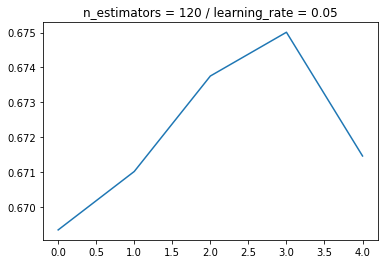

In [103]:
gbc, best_score = optimize2(n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_depth=max_depth,
                            max_features=max_features)

In [105]:
best_score 

0.6714659064180626

In [106]:
models = np.append(models, gbc)
models

array([GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=250,
                                  n_estimators=None, random_state=0)         ,
       GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=None,
                                  n_estimators=60, random_state=0)            ,
       GradientBoostingClassifier(max_depth=7, max_features='sqrt',
                                  min_samples_leaf=None, min_samples_split=250,
                                  n_estimators=60, random_state=0)             ,
       GradientBoostingClassifier(max_depth=7, min_samples_leaf=35,
                                  min_samples_split=250, n_estimators=60,
                                  random_state=0)                        ,
       GradientBoostingClassifier(max_depth=7, min_samples_leaf=35,
                               

In [107]:
scores = np.append(scores, best_score)
scores

array([0.66934942, 0.6710223 , 0.67375489, 0.67500802, 0.67146591])

In [108]:
# Model 6
n_estimators = opt_params['n_estimators'] * 5
learning_rate = learning_rate / 5
min_samples_split = opt_params['min_samples_split'] #The minimum number of samples required to split an internal node:
min_samples_leaf = opt_params['min_samples_leaf'] #The minimum number of samples required to be at a leaf node. 
max_depth = opt_params['max_depth'] #The maximum depth of the individual regression estimators.
max_features = opt_params['max_features'] #The number of features to consider when looking for the best split

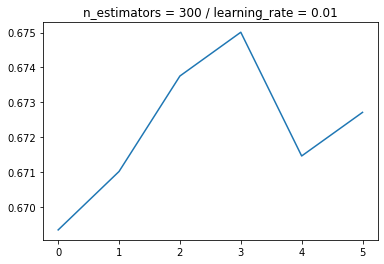

In [109]:
gbc, best_score = optimize2(n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_depth=max_depth,
                            max_features=max_features)

In [110]:
best_score 

0.6727147367617226

In [111]:
models = np.append(models, gbc)
models

array([GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=250,
                                  n_estimators=None, random_state=0)         ,
       GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=None,
                                  n_estimators=60, random_state=0)            ,
       GradientBoostingClassifier(max_depth=7, max_features='sqrt',
                                  min_samples_leaf=None, min_samples_split=250,
                                  n_estimators=60, random_state=0)             ,
       GradientBoostingClassifier(max_depth=7, min_samples_leaf=35,
                                  min_samples_split=250, n_estimators=60,
                                  random_state=0)                        ,
       GradientBoostingClassifier(max_depth=7, min_samples_leaf=35,
                               

In [112]:
scores = np.append(scores, best_score)
scores

array([0.66934942, 0.6710223 , 0.67375489, 0.67500802, 0.67146591,
       0.67271474])

In [118]:
# Model 7
n_estimators = 2000
learning_rate = learning_rate / 2
min_samples_split = opt_params['min_samples_split'] #The minimum number of samples required to split an internal node:
min_samples_leaf = opt_params['min_samples_leaf'] #The minimum number of samples required to be at a leaf node. 
max_depth = opt_params['max_depth'] #The maximum depth of the individual regression estimators.
max_features = opt_params['max_features'] #The number of features to consider when looking for the best split

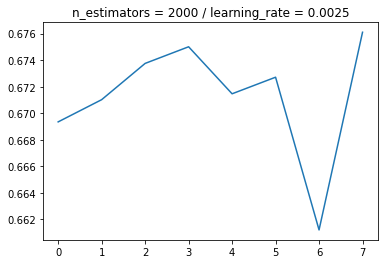

In [119]:
gbc, best_score = optimize2(n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_depth=max_depth,
                            max_features=max_features)

In [120]:
best_score

0.6761028017251032

In [121]:
models = np.append(models, gbc)
models

array([GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=250,
                                  n_estimators=None, random_state=0)         ,
       GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=None,
                                  n_estimators=60, random_state=0)            ,
       GradientBoostingClassifier(max_depth=7, max_features='sqrt',
                                  min_samples_leaf=None, min_samples_split=250,
                                  n_estimators=60, random_state=0)             ,
       GradientBoostingClassifier(max_depth=7, min_samples_leaf=35,
                                  min_samples_split=250, n_estimators=60,
                                  random_state=0)                        ,
       GradientBoostingClassifier(max_depth=7, min_samples_leaf=35,
                               

In [122]:
scores = np.append(scores, best_score)
scores

array([0.66934942, 0.6710223 , 0.67375489, 0.67500802, 0.67146591,
       0.67271474, 0.66120944, 0.6761028 ])

In [123]:
# Model 8
n_estimators = n_estimators * 5
learning_rate = learning_rate / 5
min_samples_split = opt_params['min_samples_split'] #The minimum number of samples required to split an internal node:
min_samples_leaf = opt_params['min_samples_leaf'] #The minimum number of samples required to be at a leaf node. 
max_depth = opt_params['max_depth'] #The maximum depth of the individual regression estimators.
max_features = opt_params['max_features'] #The number of features to consider when looking for the best split

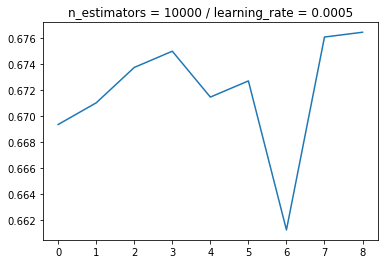

In [124]:
gbc, best_score = optimize2(n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_depth=max_depth,
                            max_features=max_features)

In [125]:
best_score

0.676472842305144

In [126]:
models = np.append(models, gbc)
models

array([GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=250,
                                  n_estimators=None, random_state=0)         ,
       GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                                  min_samples_leaf=20, min_samples_split=None,
                                  n_estimators=60, random_state=0)            ,
       GradientBoostingClassifier(max_depth=7, max_features='sqrt',
                                  min_samples_leaf=None, min_samples_split=250,
                                  n_estimators=60, random_state=0)             ,
       GradientBoostingClassifier(max_depth=7, min_samples_leaf=35,
                                  min_samples_split=250, n_estimators=60,
                                  random_state=0)                        ,
       GradientBoostingClassifier(max_depth=7, min_samples_leaf=35,
                               

In [127]:
scores = np.append(scores, best_score)
scores

array([0.66934942, 0.6710223 , 0.67375489, 0.67500802, 0.67146591,
       0.67271474, 0.66120944, 0.6761028 , 0.67647284])

In [129]:
print('Model with best score: ', scores.argmax())
print('Score of the best model: ', scores.max())

Model with best score:  8
Score of the best model:  0.676472842305144


In [132]:
best_model = models[-1]
best_model

GradientBoostingClassifier(learning_rate=0.0005, max_depth=7, max_features=27,
                           min_samples_leaf=35, min_samples_split=250,
                           n_estimators=10000, random_state=0)

### Using the best model to train and predict labels

In [133]:
best_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.0005, max_depth=7, max_features=27,
                           min_samples_leaf=35, min_samples_split=250,
                           n_estimators=10000, random_state=0)

In [134]:
prediction = best_model.predict_proba(X_test)

In [135]:
prediction

array([[0.84224674, 0.15775326],
       [0.96458015, 0.03541985],
       [0.94480577, 0.05519423],
       ...,
       [0.93457958, 0.06542042],
       [0.93537925, 0.06462075],
       [0.87225093, 0.12774907]])

In [137]:
prediction[:,1]

array([0.15775326, 0.03541985, 0.05519423, ..., 0.06542042, 0.06462075,
       0.12774907])

In [140]:
roc_auc_score(y_test, prediction[:,1])

0.6842654079165517

## Conclusion

## Resultados KDD Cup 2009

https://www.kdd.org/kdd-cup/view/kdd-cup-2009/Results

## Conclusões

> Nesse exercício, foi possível modelar a possibilidade do cancelamento da conta com uma área sob a curva (AUC) de 0.6868

> É bom lembrar que AUC = 0.5 indica a linha de base, no caso de um modelo que faz predições aleatórias, e AUC = 1.0 indica um modelo ideal, que faz predições perfeitas

> Pode parecer que o AUC alcançado não é muito alto, mas também temos que considerar que o score mais alto no desafio público foi de 0.76

> Isso indica que, muito possivelmente, os dados fornecidos não são suficientes para fazer a modelagem perfeita do cancelamento da conta, e isso é sempre algo que devemos levar em consideração quando estamos tentando desenvolver modelos para problemas que não temos qualquer conhecimento prévio

> Fazendo uma analogia simples, seria como tentar predizer o peso de uma pessoa usando uma base de dados com apenas peso e altura de uma população: nós até conseguiríamos uma resposta razoável, já que as duas variáveis são correlacionadas, mas ela não seria perfeita simplesmente porque mais variáveis têm impacto no peso além da altura. É possível, portanto, que o maior score indique o melhor modelo que esses dados são capazes de fornecer

> Também devemos nos lembrar de que esses desafios geralmente são lançados sem que exista uma resposta prévia, eles servem justamente para que a própria comunidade tente encontrar soluções e comparar seus resultados entre si, e não com um "padrão ouro" ou a "resposta certa"

> Esses desafios são uma ótima oportunidade para se familiarizar com o ambiente real da carreira de um cientista de dados, e para conhecer e implementar na prática métodos e abordagens novas.

## Melhorias

> Testar outros modelos sempre é uma opção que se deve considerar. Nesse exercício, nós paramos nos classificadores do tipo gradient boosting, mas também poderíamos ter considerado modelos baseados em árvores de decisão mais novos, como o XGBoost, e até em redes neurais

> Os dados estão mascarados, o que dificulta qualquer feature engineering, já que para isso geralmente nós tentamos transformar as variáveis em função do conhecimento prévio que temos sobre elas. Por exemplo, se tivéssemos datas, poderíamos criar uma nova variável refletindo as estações do ano, se julgássemos relevante, mas nesse exercício ficamos restritos a tratar os dados com métricas estritamente numéricas, como o número de categorias que uma variável categórica possui, por não sabermos a que a variável se refere

> Mesmo com essas restrições, a seleção das melhores variáveis pode ser feita apenas considerando a natureza dos dados, e não da própria variável, e é possível testar outros métodos de seleção além daquele que nós usamos (seleção baseada em árvore de decisão)

> Também é possível melhorar o processo de fine-tuning da seguinte maneira: primeiro nós treinamos um hiperparâmetro num intervalo maior, por exemplo, [1, 2, 3, 4, 5], e depois que nós descobrimos o melhor parâmetro nessa faixa, por exemplo [2], podemos treinar de novo nas imediações desse valor, por exemplo [1.5, 2, 2.5], e assim por diante

> Ao final do treinamento apresentado no exercício (MODELO 8), nós observamos que a métrica continuava em tendência de aumentar, então talvez seja interessante continuar testando outros valores para learning rate/número de épocas

> Também é útil fazer um grid search com todos os parâmetros ao mesmo tempo, já que não necessariamente cada parâmetro se comporta da forma independente que nós consideramos, mas para isso é bom usar poucos valores para cada parâmetro (por isso é bom fazer uma seleção prévia da forma que nós fizemos), ou teríamos um número de modelos excessivamente grande pra testar, o que demanda maior capacidade de processamento